In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# World Happiness Analysis

**Objective** - Identify the primary factor influencing a country's happiness and potentially develop a model that recommends which feature improvement would yield the most significant impact.

**Data** - Utilizing publicly available datasets from Kaggle, specifically the World Happiness Report for the years 2023, 2022, 2021, and 2020.


# Exploring the Dataset

In [2]:
# import data from few years
data2023 = pd.read_csv("WHR-Dataset/2023.csv") 
data2022 = pd.read_csv("WHR-Dataset/2022.csv")
data2021 = pd.read_csv("WHR-Dataset/2021.csv")
data2020 = pd.read_csv("WHR-Dataset/2020.csv")
data2019 = pd.read_csv("WHR-Dataset/2019.csv")
data2018 = pd.read_csv("WHR-Dataset/2018.csv") 
data2017 = pd.read_csv("WHR-Dataset/2017.csv")
data2016 = pd.read_csv("WHR-Dataset/2016.csv")
data2015 = pd.read_csv("WHR-Dataset/2015.csv")

In [3]:
print(data2023.shape)
data2023.head(10)

(137, 19)


,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110
5,Sweden,7.395,0.037,7.468,7.322,10.883,0.939,72.150,0.948,0.165,0.202,1.778,1.921,1.510,0.562,0.754,0.225,0.520,1.903
6,Norway,7.315,0.044,7.402,7.229,11.088,0.943,71.500,0.947,0.141,0.283,1.778,1.994,1.521,0.544,0.752,0.212,0.463,1.829
7,Switzerland,7.240,0.043,7.324,7.156,11.164,0.920,72.900,0.891,0.027,0.266,1.778,2.022,1.463,0.582,0.678,0.151,0.475,1.870
8,Luxembourg,7.228,0.069,7.363,7.093,11.660,0.879,71.675,0.915,0.024,0.345,1.778,2.200,1.357,0.549,0.710,0.149,0.418,1.845
9,New Zealand,7.123,0.038,7.198,7.048,10.662,0.952,70.350,0.887,0.175,0.271,1.778,1.842,1.544,0.513,0.672,0.230,0.471,1.852


In [4]:
print(data2022.shape)
data2022.head(3)

(147, 12)


,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"


In [5]:
print(data2021.shape)
data2021.head(3)

(149, 20)


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839


In [6]:
print(data2020.shape)
data2020.head(3)

(153, 20)


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267


In [8]:
print("How many nulls?")
print("\n2023\n")
print(data2023.isnull().sum())
print("\n2022\n")
print(data2022.isnull().sum())
print("\n2021\n")
print(data2021.isnull().sum())
print("\n2020\n")
print(data2020.isnull().sum())

How many nulls?

2023

Country name                                  0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       1
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           1
dtype: int64

2022

RANK                                         

## Exploring 2023 World Happiness Report

In [67]:
data2023.dtypes

Country name                                   object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
Dystopia + residual         

In [9]:
# checking the null in data2023
data2023[data2023.isnull().any(axis=1)]
data2023.dropna(inplace=True)

In [10]:
print(data2023.columns)

Index(['Country name', 'Ladder score', 'Standard error of ladder score',
       'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')


In [11]:
data2023.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,1.360000e+02,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,5.544441,0.064515,5.670772,5.418015,9.455191,0.798632,64.967632,0.788081,0.023566,0.724588,1.778000e+00,1.408919,1.155088,0.366176,0.540912,0.149088,0.146478,1.777838
std,1.142841,0.022996,1.120442,1.166522,1.210107,0.129597,5.750390,0.112498,0.141604,0.177353,4.457310e-16,0.433969,0.327263,0.156691,0.149671,0.075993,0.127009,0.504390
min,1.859000,0.029000,1.923000,1.795000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000,1.778000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.110000
25%,4.702500,0.046750,4.939750,4.492250,8.587250,0.721000,60.648500,0.726250,-0.071000,0.666000,1.778000e+00,1.097750,0.959750,0.248500,0.458750,0.098500,0.059750,1.555250
50%,5.693500,0.060000,5.824000,5.550500,9.574500,0.826500,65.837500,0.801000,0.002000,0.772500,1.778000e+00,1.451500,1.225500,0.389500,0.557500,0.137500,0.112000,1.848500
75%,6.342500,0.076250,6.452000,6.244750,10.540250,0.896000,69.412500,0.874750,0.117500,0.846000,1.778000e+00,1.798000,1.401250,0.487500,0.656750,0.199250,0.188250,2.078750
max,7.804000,0.147000,7.875000,7.733000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000,1.778000e+00,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000,2.955000


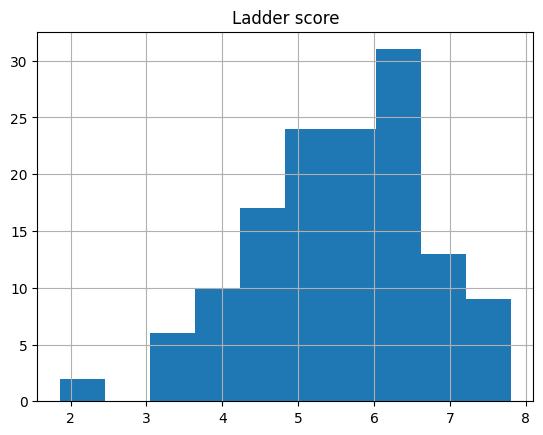

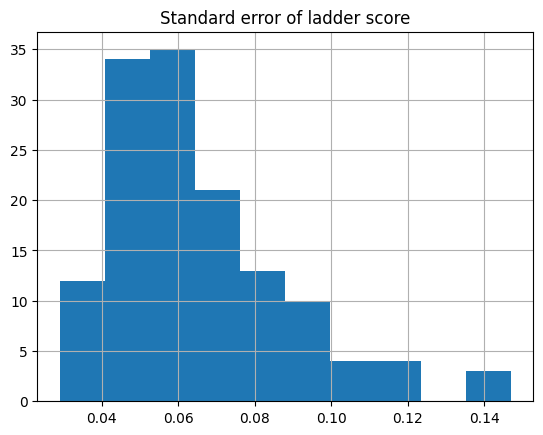

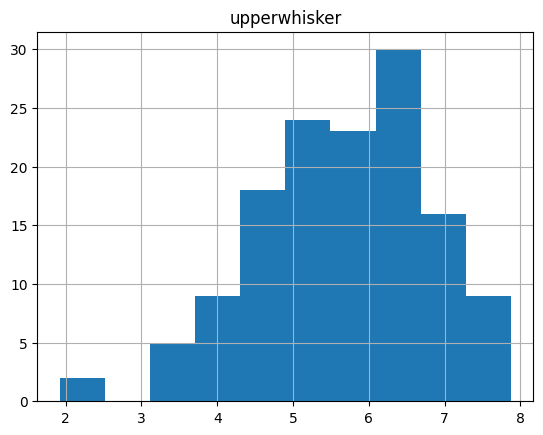

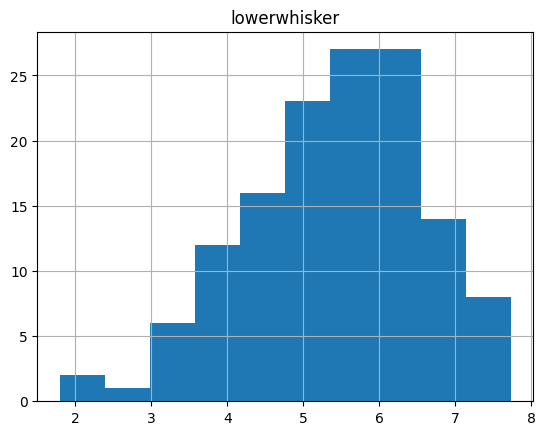

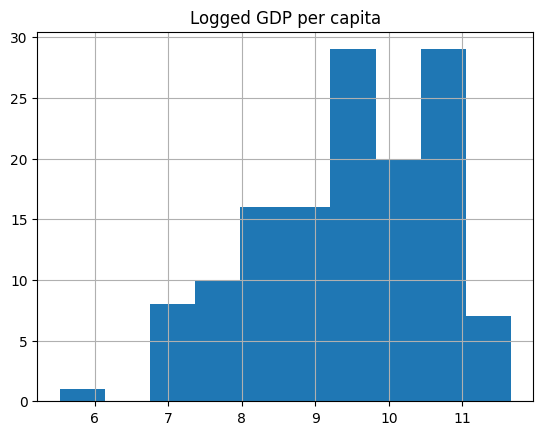

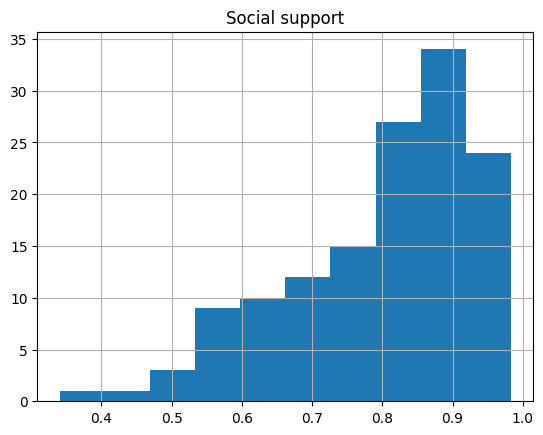

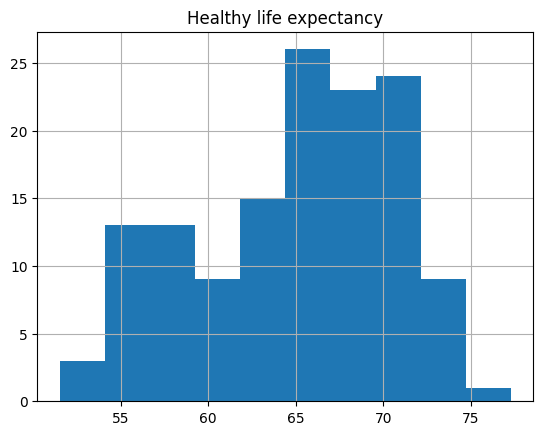

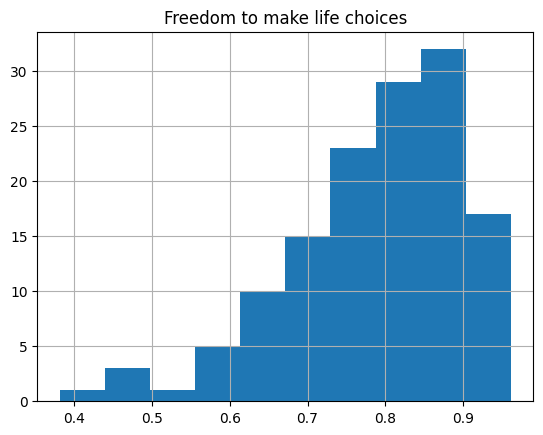

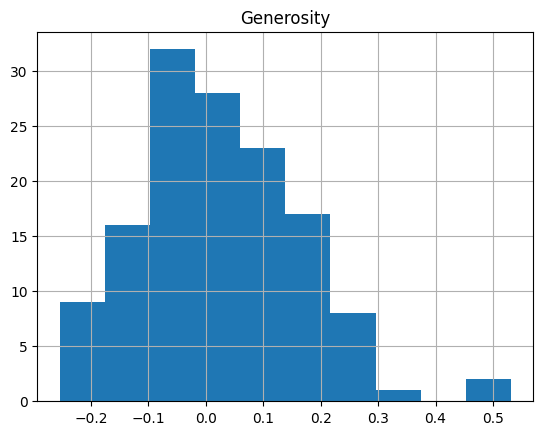

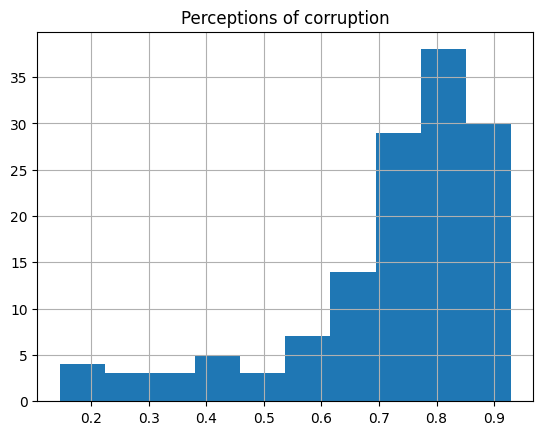

In [12]:
main_cols = data2023.columns[:11] # Main columns
for col in main_cols[1:]: # first col is country name
    data2023[col].hist()
    plt.title(col)
    figsize = (6, 2)
    plt.show()

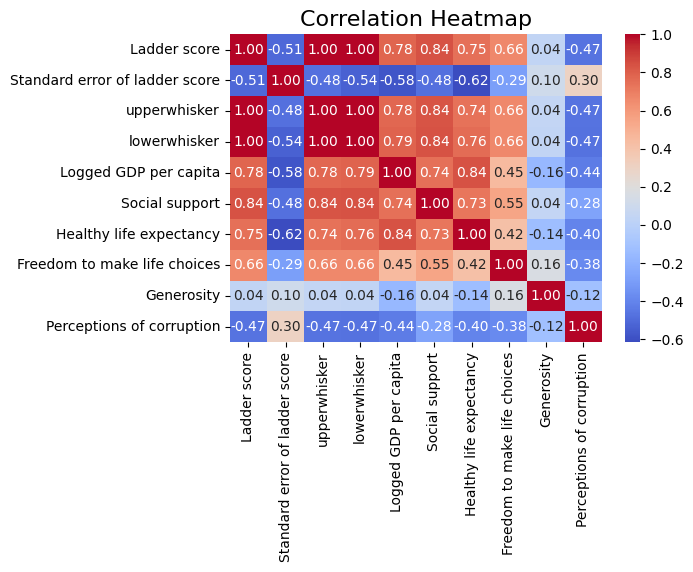

In [13]:
correlation_matrix = data2023[main_cols[1:]].corr()

# Adjust the size of the heatmap
plt.figure(figsize=(6, 4))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


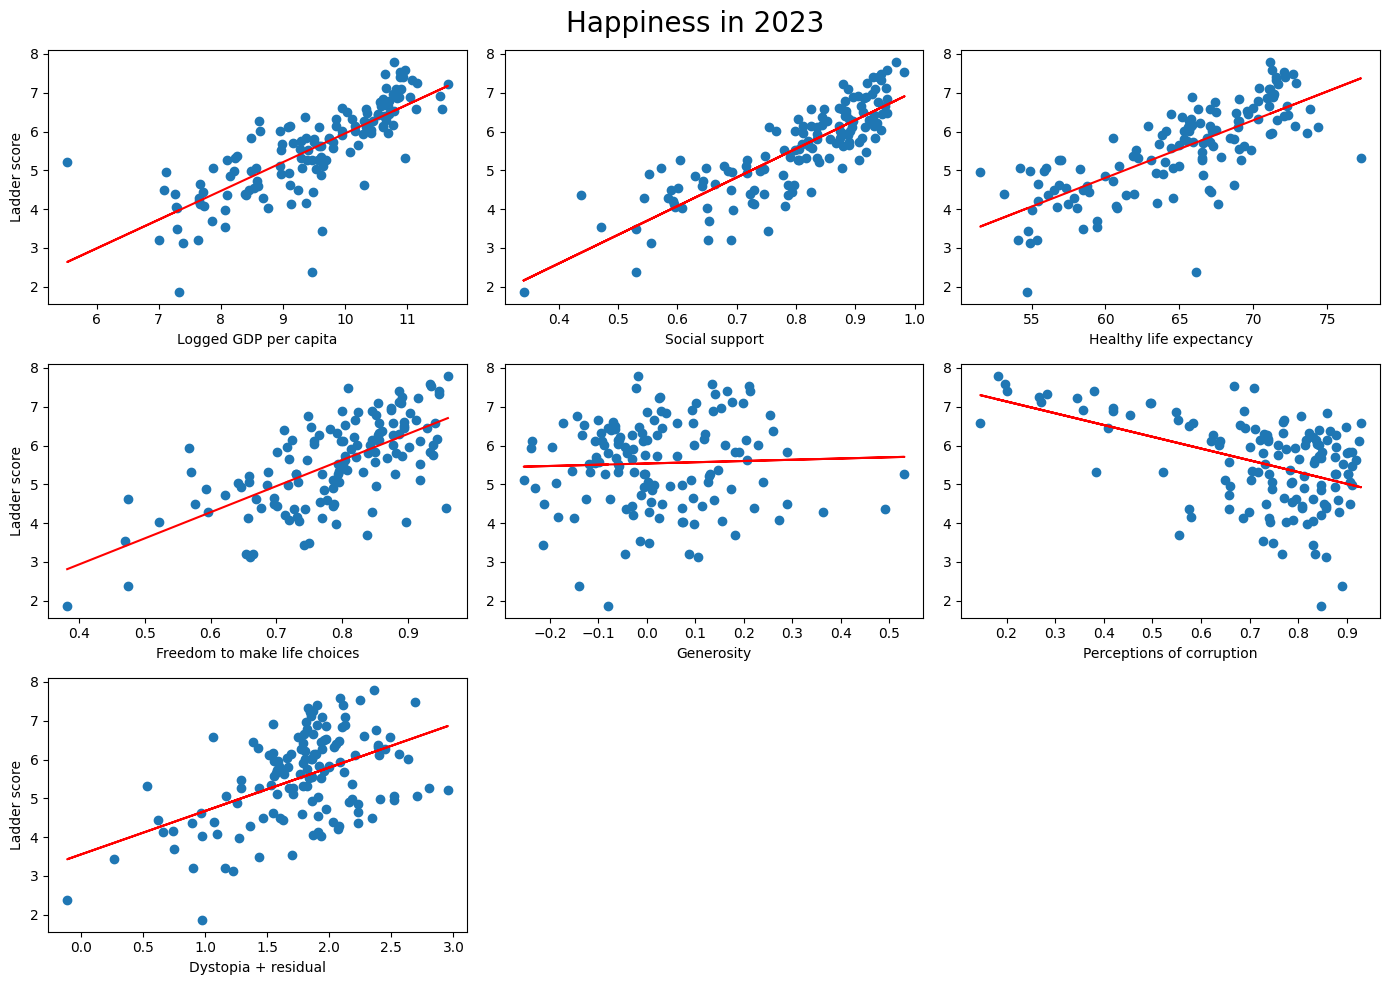

In [14]:
# plotting every column with Ladder score
features_columns = ["Logged GDP per capita", 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Dystopia + residual']
features = data2023[features_columns]
target = data2023['Ladder score']

# plot settings
n_cols = 3
n_rows = len(features_columns) // n_cols + 1
figsize = (14, 10)
fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize)
fig.suptitle('Happiness in 2023', fontsize=20)
index = 0

for i in range(n_rows):
    ax[i][0].set_ylabel('Ladder score')
    for j in range(n_cols):
        if index < len(features_columns):
            x = features[features_columns[index]]
            ax[i][j].scatter(x, target)
            ax[i][j].set_xlabel(features_columns[index])

            # adding line to the data
            fit = np.polyfit(x, target, 1)
            ax[i][j].plot(x, fit[0] * x + fit[1], color='red')

            index += 1
        else:
            # If there are no more features, remove the empty subplot
            fig.delaxes(ax[i][j])

plt.tight_layout()
plt.show()


So it's turns out generosity isn't that much important,in addition the higher perception of corruption, the lower happiness of people, it makes sense because in countries where people notice more corruption, it's likely that there is in fact more corruption. And it's looks like the most important feature is social support.

## Making dataset containg World Happiness Report of years 2020-2023

In [15]:
# let's build the full dataset from all the years and compare the results
print('targeted feature columns:')
print(features_columns)
print('\n2023 columns:\n')
print(data2023.columns)
print('\n2022 columns:\n')
print(data2022.columns)
print('\n2021 columns:\n')
print(data2021.columns)
print('\n2020 columns:\n')
print(data2020.columns)

targeted feature columns:
['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Dystopia + residual']

2023 columns:

Index(['Country name', 'Ladder score', 'Standard error of ladder score',
       'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

2022 columns:

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explain

In [16]:
wanted_columns = features_columns + ['Ladder score'] + ['Country name']
# 2023
data_reforged_2023 = data2023[wanted_columns]
data_reforged_2023['year'] = 2023
data_reforged_2023.shape

(136, 10)

In [17]:
# we skipped the year 2022 because it doesn't has wanted features
col_mapping_2022 = {'Country':'Country name', 'Happiness score':'Ladder score',
       'Dystopia (1.83) + residual':'Dystopia + residual'}
data_reforged_2022 = data2022.rename(columns=col_mapping_2022)

In [18]:
# 2021
data_reforged_2021 = data2021[wanted_columns]
data_reforged_2021['year'] = 2021
data_reforged_2021.shape

(149, 10)

In [19]:
# 2020
data_reforged_2020 = data2020[wanted_columns]
data_reforged_2020['year'] = 2020
data_reforged_2020.shape

(153, 10)

In [20]:
# merge
data_2020_2023 = pd.concat([data_reforged_2023,data_reforged_2021,data_reforged_2020],ignore_index=True)
data_2020_2023

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Ladder score,Country name,year
0,10.792000,0.969000,71.150000,0.961000,-0.019000,0.182000,2.363000,7.8040,Finland,2023
1,10.962000,0.954000,71.250000,0.934000,0.134000,0.196000,2.084000,7.5860,Denmark,2023
2,10.896000,0.983000,72.050000,0.936000,0.211000,0.668000,2.250000,7.5300,Iceland,2023
3,10.639000,0.943000,72.697000,0.809000,-0.023000,0.708000,2.691000,7.4730,Israel,2023
4,10.942000,0.930000,71.550000,0.887000,0.213000,0.379000,2.110000,7.4030,Netherlands,2023
...,...,...,...,...,...,...,...,...,...,...
433,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,2.860198,3.4759,Central African Republic,2020
434,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,0.548445,3.3123,Rwanda,2020
435,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,0.841031,3.2992,Zimbabwe,2020
436,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.378751,2.8166,South Sudan,2020


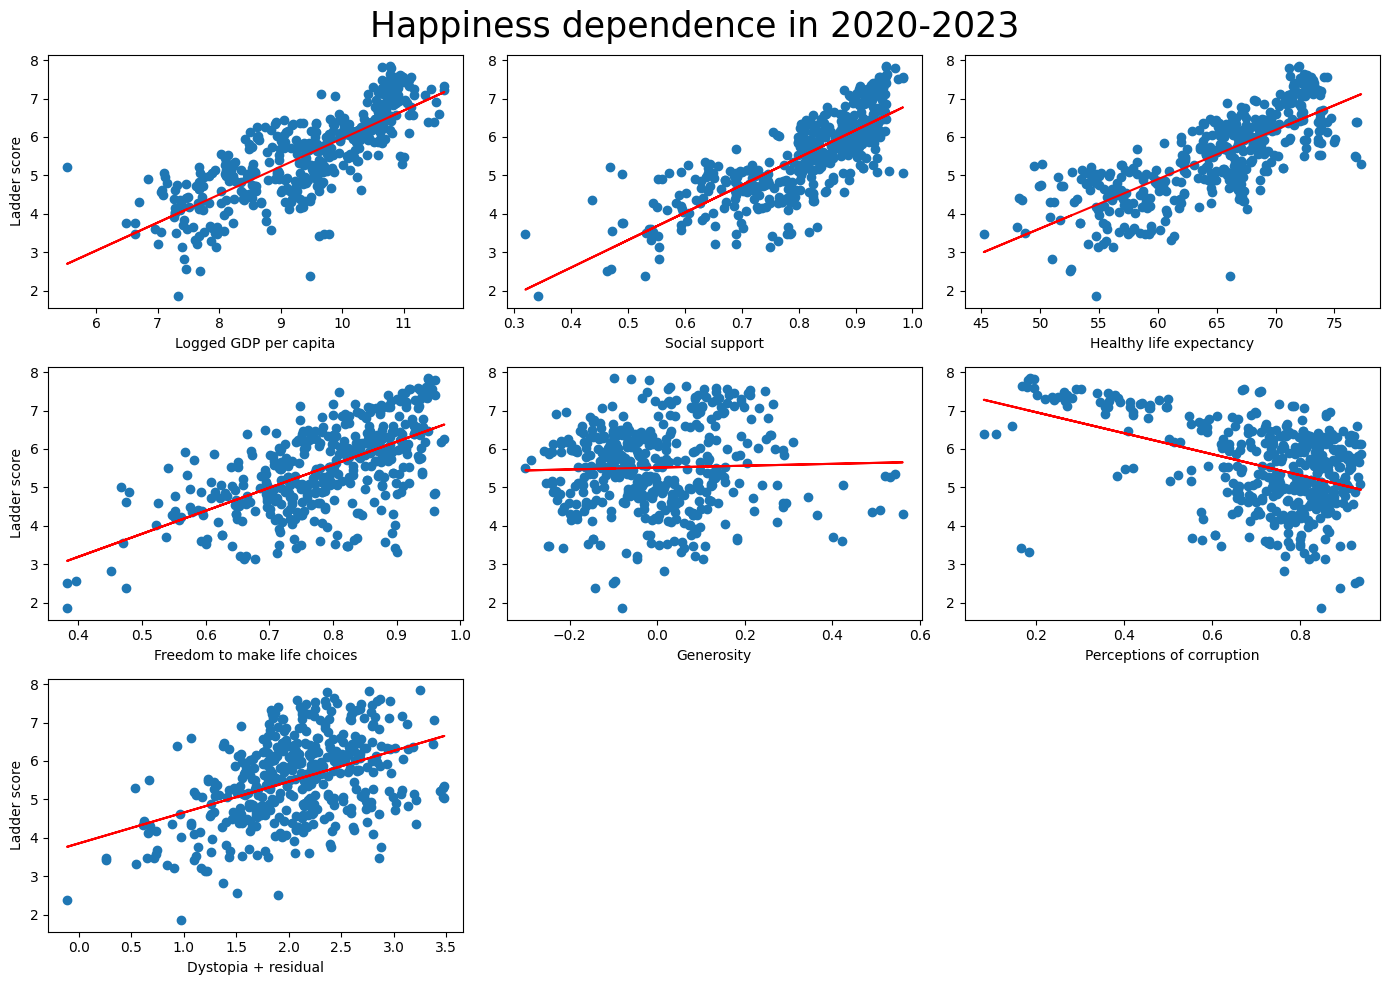

In [21]:
# plotting every column with Ladder score
features_columns = ["Logged GDP per capita",'Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','Dystopia + residual']
features = data_2020_2023[features_columns]
target = data_2020_2023['Ladder score']

# plot settings
n_cols = 3
n_rows = len(features_columns) // n_cols + 1
figsize = (14, 10)
fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize)
fig.suptitle('Happiness dependence in 2020-2023', fontsize=25)
index = 0

for i in range(n_rows):
    ax[i][0].set_ylabel('Ladder score')
    for j in range(n_cols):
        if index < len(features_columns):
            x = features[features_columns[index]]
            ax[i][j].scatter(x, target)
            ax[i][j].set_xlabel(features_columns[index])

            # adding line to the data
            fit = np.polyfit(x, target, 1)
            ax[i][j].plot(x, fit[0] * x + fit[1], color='red')

            index += 1
        else:
            # If there are no more features, remove the empty subplot
            fig.delaxes(ax[i][j])

plt.tight_layout()
plt.show()

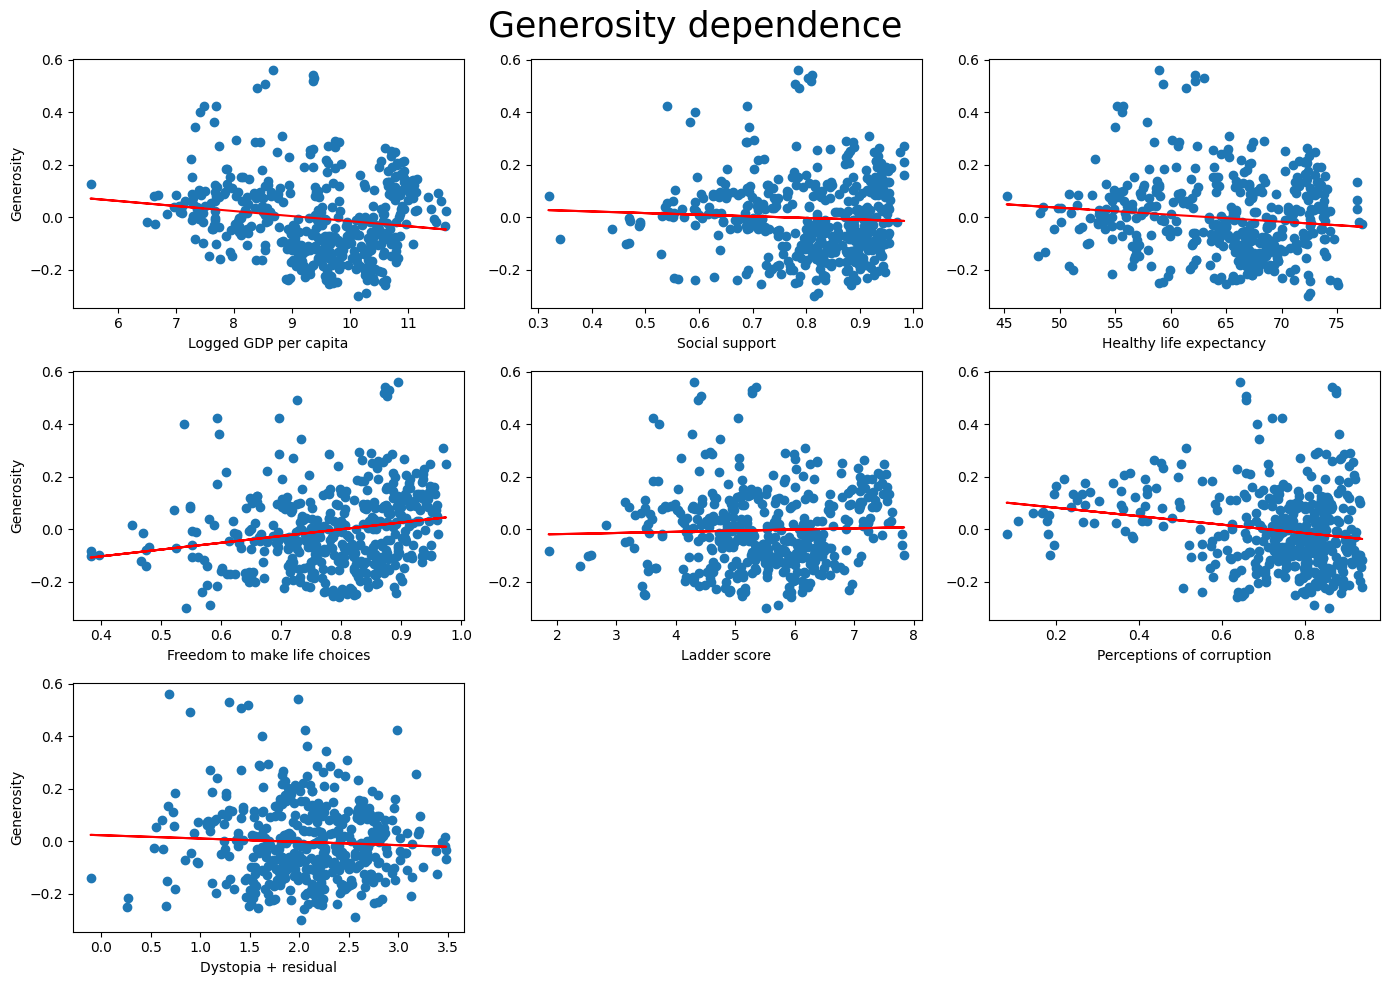

In [22]:
# plotting every column with Generosity
features_columns = ["Logged GDP per capita",'Social support','Healthy life expectancy','Freedom to make life choices','Ladder score','Perceptions of corruption','Dystopia + residual']
features = data_2020_2023[features_columns]
target = data_2020_2023['Generosity']
fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize)
fig.suptitle('Generosity dependence', fontsize=25)
index = 0

for i in range(n_rows):
    ax[i][0].set_ylabel('Generosity')
    for j in range(n_cols):
        if index < len(features_columns):
            x = features[features_columns[index]]
            ax[i][j].scatter(x, target)
            ax[i][j].set_xlabel(features_columns[index])

            # adding line to the data
            fit = np.polyfit(x, target, 1)
            ax[i][j].plot(x, fit[0] * x + fit[1], color='red')

            index += 1
        else:
            # If there are no more features, remove the empty subplot
            fig.delaxes(ax[i][j])

plt.tight_layout()
plt.show()


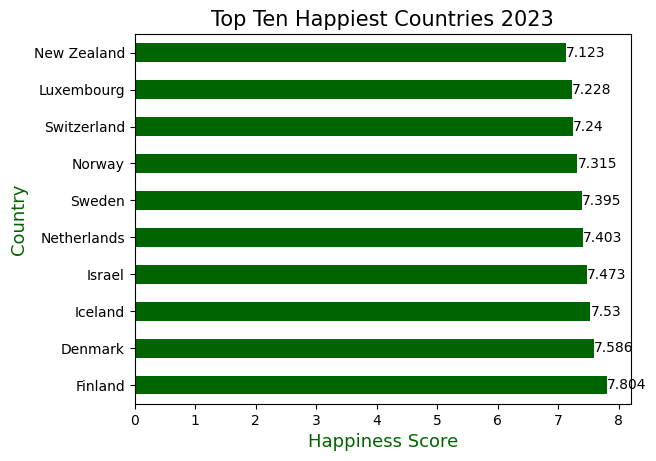

In [23]:
top_ten = data2023.head(10)
ax = top_ten[["Country name","Ladder score"]].sort_values(by = "Ladder score",ascending =False).plot(x="Country name",y="Ladder score",kind="barh",color="darkgreen",legend=False)
ax.bar_label(ax.containers[0])
plt.title("Top Ten Happiest Countries 2023",fontsize=15)
plt.ylabel("Country",color="darkgreen",fontsize=13)
plt.xlabel("Happiness Score",color="darkgreen",fontsize=13)
plt.show()

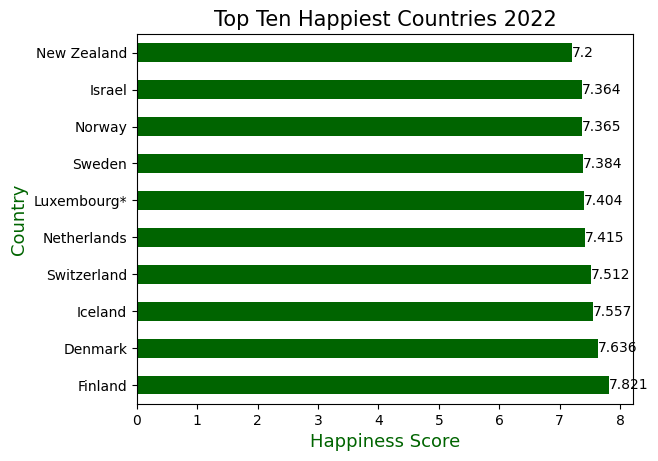

In [24]:
top_ten = data_reforged_2022.head(10)
for i in range(10):
    top_ten["Ladder score"].iloc[i] = top_ten["Ladder score"].iloc[i].replace(',','.')
    
top_ten["Ladder score"] = top_ten["Ladder score"].astype(float)
top_ten
ax = top_ten[["Country name","Ladder score"]].sort_values(by = "Ladder score",ascending =False).plot(x="Country name",y="Ladder score",kind="barh",color="darkgreen",legend=False)
ax.bar_label(ax.containers[0])
plt.title("Top Ten Happiest Countries 2022",fontsize=15)
plt.ylabel("Country",color="darkgreen",fontsize=13)
plt.xlabel("Happiness Score",color="darkgreen",fontsize=13)
plt.show()


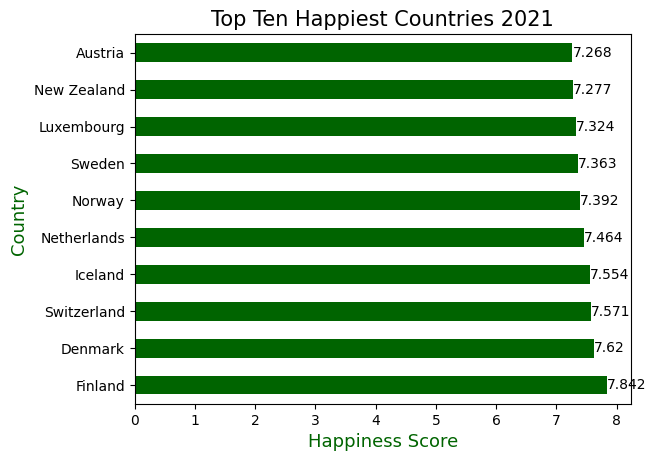

In [25]:
top_ten = data_reforged_2021.head(10)
ax = top_ten[["Country name","Ladder score"]].sort_values(by = "Ladder score",ascending =False).plot(x="Country name",y="Ladder score",kind="barh",color="darkgreen",legend=False)
ax.bar_label(ax.containers[0])
plt.title("Top Ten Happiest Countries 2021",fontsize=15)
plt.ylabel("Country",color="darkgreen",fontsize=13)
plt.xlabel("Happiness Score",color="darkgreen",fontsize=13)
plt.show()


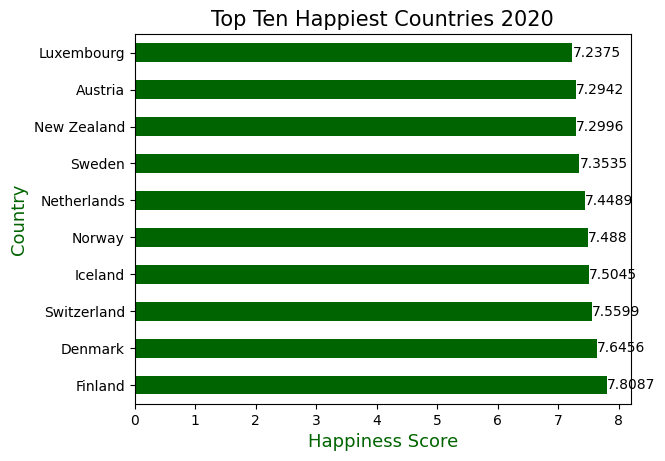

In [26]:
top_ten = data_reforged_2020.head(10)
ax = top_ten[["Country name","Ladder score"]].sort_values(by = "Ladder score",ascending =False).plot(x="Country name",y="Ladder score",kind="barh",color="darkgreen",legend=False)
ax.bar_label(ax.containers[0])
plt.title("Top Ten Happiest Countries 2020",fontsize=15)
plt.ylabel("Country",color="darkgreen",fontsize=13)
plt.xlabel("Happiness Score",color="darkgreen",fontsize=13)
plt.show()

# Making model for predicting healthy life expectancy
For predicting we will be only using few features: gdp, social support,freedom,perception of corruption,distopia+residual,generosity

In [27]:
# let's select these years that has these features
data_list = [data2015,data2016,data2017,data2018,data2019,data2022]
for i in range(len(data_list)):
    print(f'\n year {2015+i} \n')
    print(data_list[i].columns.tolist())

print('\n years 2020,2021,2023 \n')
print(data_2020_2023.columns.tolist()) # we already merged that
wanted_cols = ['gdp per capita','social support','freedom','corruption','dystopia + residual','generosity','life expectancy']


 year 2015 

['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

 year 2016 

['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

 year 2017 

['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']

 year 2018 

['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

 year 2019 

['Overall rank', 'Country or region'

not all years seem to have features we need , 2022 has only 'explained by' features that explain how impactful feature was on happiness score, 2018 and 2019 don't have dystopia+residual

## columns refactoring

In [28]:
# 2015
cols_new = {'Economy (GDP per Capita)':'gdp per capita', 'Family':'social support', 'Health (Life Expectancy)':'life expectancy', 
               'Freedom':'freedom', 'Trust (Government Corruption)':'corruption', 'Generosity':'generosity', 'Dystopia Residual':'dystopia + residual'}
data2015_refact = data2015.rename(columns=cols_new)[wanted_cols]
print(data2015_refact.columns.tolist())

['gdp per capita', 'social support', 'freedom', 'corruption', 'dystopia + residual', 'generosity', 'life expectancy']


In [29]:
# 2016
cols_new = {'Economy (GDP per Capita)':'gdp per capita', 'Family':'social support', 'Health (Life Expectancy)':'life expectancy', 
               'Freedom':'freedom', 'Trust (Government Corruption)':'corruption', 'Generosity':'generosity', 'Dystopia Residual':'dystopia + residual'}
data2016_refact = data2016.rename(columns=cols_new)[wanted_cols]
print(data2016_refact.columns.tolist())

['gdp per capita', 'social support', 'freedom', 'corruption', 'dystopia + residual', 'generosity', 'life expectancy']


In [30]:
# 2017
cols_new = {'Economy..GDP.per.Capita.':'gdp per capita', 'Family':'social support', 'Health..Life.Expectancy.':'life expectancy', 'Freedom':'freedom', 'Generosity':'generosity', 'Trust..Government.Corruption.':'corruption', 'Dystopia.Residual':'dystopia + residual'}
data2017_refact = data2017.rename(columns=cols_new)[wanted_cols]
print(data2017_refact.columns.tolist())

['gdp per capita', 'social support', 'freedom', 'corruption', 'dystopia + residual', 'generosity', 'life expectancy']


In [31]:
# 2020,2021,2023
cols_new = {'Logged GDP per capita':'gdp per capita', 'Social support':'social support', 'Healthy life expectancy':'life expectancy', 'Freedom to make life choices':'freedom', 'Generosity':'generosity', 'Perceptions of corruption':'corruption', 'Dystopia + residual':'dystopia + residual',}
data2020_2021_2023_refact = data_2020_2023.rename(columns=cols_new)[wanted_cols]
print(data2020_2021_2023_refact.columns.tolist())

['gdp per capita', 'social support', 'freedom', 'corruption', 'dystopia + residual', 'generosity', 'life expectancy']


In [32]:
# checking ptp
def ptp(data_frame):
    print('\n PTP \n')
    for col in data_frame.columns:
        print(col)
        print(max(data_frame[col])-min(data_frame[col]))

In [33]:
print('\n 2015')
ptp(data2015_refact)
print('\n 2016')
ptp(data2016_refact)
print('\n 2017')
ptp(data2017_refact)
print('\n 2020-2023')
ptp(data2020_2021_2023_refact)


 2015

 PTP 

gdp per capita
1.69042
social support
1.40223
freedom
0.66973
corruption
0.55191
dystopia + residual
3.27356
generosity
0.79588
life expectancy
1.02525

 2016

 PTP 

gdp per capita
1.82427
social support
1.18326
freedom
0.60848
corruption
0.50521
dystopia + residual
3.01983
generosity
0.81971
life expectancy
0.95277

 2017

 PTP 

gdp per capita
1.87076568603516
social support
1.6105740070343
freedom
0.658248662948608
corruption
0.46430778503418
dystopia + residual
2.7395708560943604
generosity
0.838075160980225
life expectancy
0.949492394924164

 2020-2023

 PTP 

gdp per capita
6.133
social support
0.6635401439999999
freedom
0.592998116
corruption
0.857
dystopia + residual
3.592
generosity
0.8615713709999999
life expectancy
32.07999924


## conclusion
Unfortunatelly data from 2015,2016,2017 are scaled differently from in 2020-2023, so we will train the model only with data from 2020,2021,2023

## Finalizing Dataset

In [34]:
data_2015_2017 = pd.concat([data2015_refact,data2016_refact,data2017_refact])
data_2020_2023 = data2020_2021_2023_refact # without 2022 

In [35]:
# checking nulls
data_2020_2023.isnull().sum()

gdp per capita         0
social support         0
freedom                0
corruption             0
dystopia + residual    0
generosity             0
life expectancy        0
dtype: int64

In [36]:
X,y = data_2020_2023.drop('life expectancy',axis=1),data_2020_2023['life expectancy']
print(X)
print(y)
ptp(X)

     gdp per capita  social support   freedom  corruption  \
0         10.792000        0.969000  0.961000    0.182000   
1         10.962000        0.954000  0.934000    0.196000   
2         10.896000        0.983000  0.936000    0.668000   
3         10.639000        0.943000  0.809000    0.708000   
4         10.942000        0.930000  0.887000    0.379000   
..              ...             ...       ...         ...   
433        6.625160        0.319460  0.640881    0.891807   
434        7.600104        0.540835  0.900589    0.183541   
435        7.865712        0.763093  0.711458    0.810237   
436        7.425360        0.553707  0.451314    0.763417   
437        7.462861        0.470367  0.396573    0.933687   

     dystopia + residual  generosity  
0               2.363000   -0.019000  
1               2.084000    0.134000  
2               2.250000    0.211000  
3               2.691000   -0.023000  
4               2.110000    0.213000  
..                   ...         

feature are scaled, good

## Training AdaBoost model using Decision Trees

In [37]:
#Data Splitting 
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [38]:
#Loading all necessary Libraries 

from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [43]:
# Block 3: Defining variables
n_estimators_list = [1, 10, 20, 50, 100, 200, 300, 400, 500, 1000]
mse_values_dt_train = []
mse_values_dt_val = []
mse_values_dt_train = []

In [44]:
#Finding Optimum estimator for AdaBoost

for n_estimators in n_estimators_list:
    base_model_dt = DecisionTreeRegressor(max_depth=3)
    adaboost_model_dt = AdaBoostRegressor(base_model_dt, n_estimators=n_estimators, random_state=42)
    adaboost_model_dt.fit(X_train, y_train)
    
    # Evaluate on training set
    y_pred_dt_train = adaboost_model_dt.predict(X_train)
    mse_dt_train = mean_squared_error(y_train, y_pred_dt_train)
    mse_values_dt_train.append(mse_dt_train)
    
    # Evaluate on validation set
    y_pred_dt_val = adaboost_model_dt.predict(X_val)
    mse_dt_val = mean_squared_error(y_val, y_pred_dt_val)
    mse_values_dt_val.append(mse_dt_val)
    
    print(f'Mean Squared Error (AdaBoost with Decision Trees, n_estimators={n_estimators}) - Training Set: {mse_dt_train}, Validation Set: {mse_dt_val}')

Mean Squared Error (AdaBoost with Decision Trees, n_estimators=1) - Training Set: 9.26801721506245, Validation Set: 13.430112220656708
Mean Squared Error (AdaBoost with Decision Trees, n_estimators=10) - Training Set: 6.039334422855832, Validation Set: 11.997757116614041
Mean Squared Error (AdaBoost with Decision Trees, n_estimators=20) - Training Set: 5.665861807673318, Validation Set: 11.510615320841694
Mean Squared Error (AdaBoost with Decision Trees, n_estimators=50) - Training Set: 5.061015415387433, Validation Set: 11.542414249078865
Mean Squared Error (AdaBoost with Decision Trees, n_estimators=100) - Training Set: 5.0714355296401585, Validation Set: 11.576535109757646
Mean Squared Error (AdaBoost with Decision Trees, n_estimators=200) - Training Set: 5.172990030870287, Validation Set: 11.641352327160686
Mean Squared Error (AdaBoost with Decision Trees, n_estimators=300) - Training Set: 5.290684816453452, Validation Set: 11.685515256497258
Mean Squared Error (AdaBoost with Decis

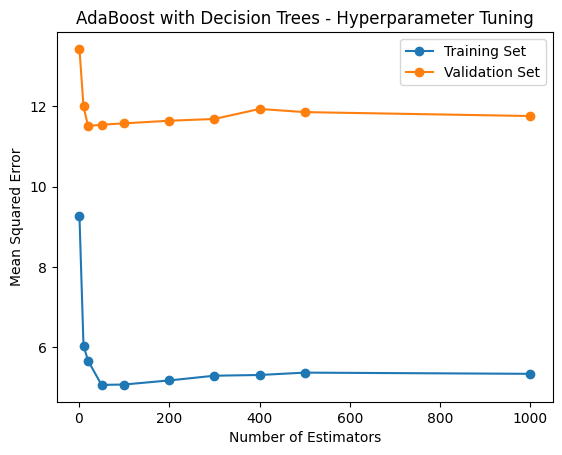

In [45]:
# Visualize the results
plt.plot(n_estimators_list, mse_values_dt_train, label='Training Set', marker='o')
plt.plot(n_estimators_list, mse_values_dt_val, label='Validation Set', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.title('AdaBoost with Decision Trees - Hyperparameter Tuning')
plt.legend()
plt.show()

In [59]:
# Select the best estimator based on the validation set
best_n_estimators_dt = n_estimators_list[mse_values_dt_val.index(min(mse_values_dt_val))]
print(f'Best Estimator for AdaBoost: {best_n_estimators_dt}')

# Train and test the model using the best estimator
final_model_dt = AdaBoostRegressor(base_model_dt, n_estimators=best_n_estimators_dt, random_state=42)
final_model_dt.fit(X_train, y_train)
y_pred_final_dt = final_model_dt.predict(X_test)
mse_final_dt = mean_squared_error(y_test, y_pred_final_dt)
print(f'Final Mean Squared Error: {mse_final_dt}')

Best Estimator for AdaBoost: 20
Final Mean Squared Error: 8.785018785815435


## Training Random Forest model

In [60]:
#Loading necessary Libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [61]:
# Defining variables
n_estimators_list = [1, 10, 20, 50, 100, 200, 300, 400, 500, 1000]
mse_values_rf_train = []
mse_values_rf_val = []

In [62]:
# Finding Optimum estimator for RandomForest
for n_estimators in n_estimators_list:
    random_forest_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    random_forest_model.fit(X_train, y_train)
    
    # Evaluate on training set
    y_pred_rf_train = random_forest_model.predict(X_train)
    mse_rf_train = mean_squared_error(y_train, y_pred_rf_train)
    mse_values_rf_train.append(mse_rf_train)
    
    # Evaluate on validation set
    y_pred_rf_val = random_forest_model.predict(X_val)
    mse_rf_val = mean_squared_error(y_val, y_pred_rf_val)
    mse_values_rf_val.append(mse_rf_val)
    
    print(f'Mean Squared Error (Random Forest, n_estimators={n_estimators}) - Training Set: {mse_rf_train}, Validation Set: {mse_rf_val}')

Mean Squared Error (Random Forest, n_estimators=1) - Training Set: 4.614813080311551, Validation Set: 17.19672039878952
Mean Squared Error (Random Forest, n_estimators=10) - Training Set: 1.5835979700800618, Validation Set: 11.374396035202079
Mean Squared Error (Random Forest, n_estimators=20) - Training Set: 1.2894714763399548, Validation Set: 10.969940793203262
Mean Squared Error (Random Forest, n_estimators=50) - Training Set: 1.0116074884230914, Validation Set: 10.471715871994041
Mean Squared Error (Random Forest, n_estimators=100) - Training Set: 0.937103508253277, Validation Set: 10.229283465714422
Mean Squared Error (Random Forest, n_estimators=200) - Training Set: 0.9259789252853018, Validation Set: 10.401404435287889
Mean Squared Error (Random Forest, n_estimators=300) - Training Set: 0.9002586215925198, Validation Set: 10.391590156702279
Mean Squared Error (Random Forest, n_estimators=400) - Training Set: 0.9023306915780637, Validation Set: 10.453538633586007
Mean Squared Err

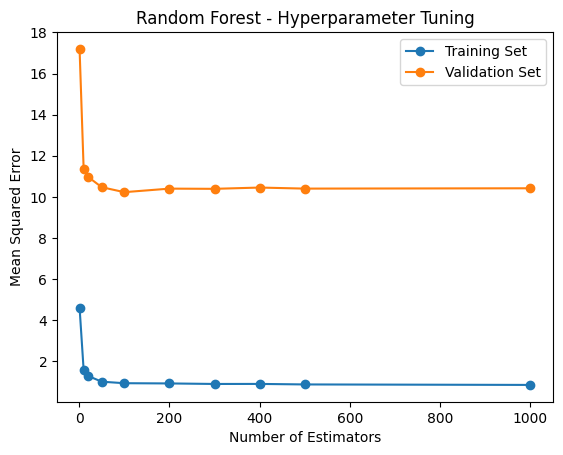

In [63]:
# Visualize the results
plt.plot(n_estimators_list, mse_values_rf_train, label='Training Set', marker='o')
plt.plot(n_estimators_list, mse_values_rf_val, label='Validation Set', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.title('Random Forest - Hyperparameter Tuning')
plt.legend()
plt.show()

In [64]:
# Select the best estimator based on the validation set
best_n_estimators_rf = n_estimators_list[mse_values_rf_val.index(min(mse_values_rf_val))]
print(f'Best Estimator for Random Forest: {best_n_estimators_rf}')

# Train and test the model using the best estimator
final_model_rf = RandomForestRegressor(n_estimators=best_n_estimators_rf, random_state=42)
final_model_rf.fit(X_train, y_train)
y_pred_final_rf = final_model_rf.predict(X_test)
mse_final_rf = mean_squared_error(y_test, y_pred_final_rf)
print(f'Final Mean Squared Error: {mse_final_rf}')

Best Estimator for Random Forest: 100
Final Mean Squared Error: 11.32332963388766


## Comparing the two models

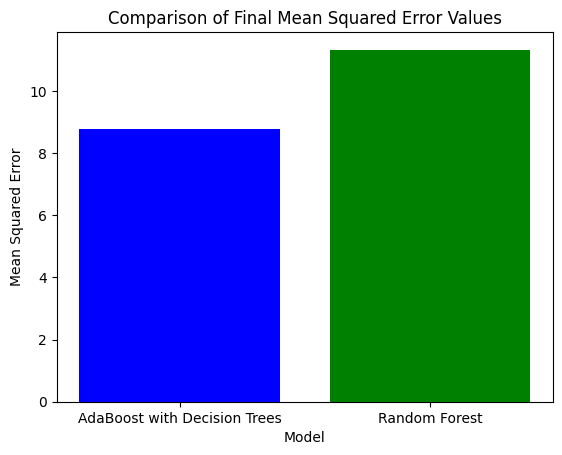

In [65]:
# Comparison of Final Mean Squared Error Values
model_names = ['AdaBoost with Decision Trees', 'Random Forest']
mse_values_final = [mse_final_dt, mse_final_rf]

# Bar Plot
plt.bar(model_names, mse_values_final, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Final Mean Squared Error Values')
plt.show()

AdaBoost with Decision Trees performs better than Random Forest at predicting the life expectancy from the given dataset.

# Example Usage of AdaBoost

In [58]:
# Select four random examples from the test set
import numpy as np

random_indices = np.random.choice(X_test.shape[0], 5, replace=False)
random_examples = X_test.iloc[random_indices]
actual_life_expectancy = y_test.iloc[random_indices]

# Use the trained AdaBoost model to make predictions
predictions = final_model_dt.predict(random_examples)

# Display the actual and predicted life expectancy for the four random examples
for i in range(5):
    print(f"Example {i + 1}: Actual Life Expectancy = {actual_life_expectancy.iloc[i]}, Predicted Life Expectancy = {predictions[i]}")

Example 1: Actual Life Expectancy = 54.713, Predicted Life Expectancy = 54.54862557505618
Example 2: Actual Life Expectancy = 55.032, Predicted Life Expectancy = 57.44223076923077
Example 3: Actual Life Expectancy = 51.0, Predicted Life Expectancy = 55.80020198803277
Example 4: Actual Life Expectancy = 57.59288788, Predicted Life Expectancy = 56.360154321607126
Example 5: Actual Life Expectancy = 71.15, Predicted Life Expectancy = 69.15493356413796
